In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['font.size'] = 15

In [12]:
file1 = pd.read_csv('data/KMeans/score/4인 가구 cluster별 총점.csv', encoding='cp949')
file1

,백화점 개수,버스정류장 개수,병원 개수,영화관 개수,제과제빵 개수,지하철 개수,카페 개수,편의점 개수,음식점 개수,어린이집_유치원 개수,초중고등학교 개수,대학교 개수,cluster,총점
0,0.011029,6.275735,0.327206,0.055147,0.503676,0.261029,8.191176,4.014706,52.860294,0.062500,0.768382,0.062500,0.0,84.393382
1,0.004975,5.094527,0.154229,0.024876,0.139303,0.099502,4.213930,2.094527,23.721393,0.039801,0.527363,0.039801,1.0,44.174129
2,0.000000,6.333333,0.262222,0.017778,0.133333,0.115556,6.800000,3.426667,39.164444,0.017778,0.644444,0.017778,2.0,66.853333
3,0.015936,3.832669,0.298805,0.035857,0.139442,0.159363,5.545817,2.625498,36.310757,0.011952,0.681275,0.011952,3.0,57.402390
4,0.000000,4.668874,0.245033,0.046358,0.059603,0.145695,6.582781,2.437086,32.622517,0.013245,0.635762,0.013245,4.0,55.642384
5,0.012000,6.532000,0.244000,0.040000,0.100000,0.156000,4.508000,2.012000,29.120000,0.036000,0.768000,0.036000,5.0,54.308000
6,0.019324,5.917874,0.289855,0.043478,0.256039,0.154589,6.995169,3.077295,39.995169,0.014493,0.661836,0.014493,6.0,67.173913
7,0.030568,6.240175,0.152838,0.131004,0.698690,0.331878,12.462882,4.484716,75.615721,0.052402,0.558952,0.052402,7.0,110.484716
8,0.029963,4.295880,0.359551,0.063670,0.438202,0.172285,9.029963,3.565543,53.790262,0.014981,0.468165,0.014981,8.0,79.842697


In [13]:
# 필요없는 컬럼 삭제 : cluster, 총점
data1 = file1.drop(['cluster', '총점'], axis=1)
data1

,백화점 개수,버스정류장 개수,병원 개수,영화관 개수,제과제빵 개수,지하철 개수,카페 개수,편의점 개수,음식점 개수,어린이집_유치원 개수,초중고등학교 개수,대학교 개수
0,0.011029,6.275735,0.327206,0.055147,0.503676,0.261029,8.191176,4.014706,52.860294,0.062500,0.768382,0.062500
1,0.004975,5.094527,0.154229,0.024876,0.139303,0.099502,4.213930,2.094527,23.721393,0.039801,0.527363,0.039801
2,0.000000,6.333333,0.262222,0.017778,0.133333,0.115556,6.800000,3.426667,39.164444,0.017778,0.644444,0.017778
3,0.015936,3.832669,0.298805,0.035857,0.139442,0.159363,5.545817,2.625498,36.310757,0.011952,0.681275,0.011952
4,0.000000,4.668874,0.245033,0.046358,0.059603,0.145695,6.582781,2.437086,32.622517,0.013245,0.635762,0.013245
5,0.012000,6.532000,0.244000,0.040000,0.100000,0.156000,4.508000,2.012000,29.120000,0.036000,0.768000,0.036000
6,0.019324,5.917874,0.289855,0.043478,0.256039,0.154589,6.995169,3.077295,39.995169,0.014493,0.661836,0.014493
7,0.030568,6.240175,0.152838,0.131004,0.698690,0.331878,12.462882,4.484716,75.615721,0.052402,0.558952,0.052402
8,0.029963,4.295880,0.359551,0.063670,0.438202,0.172285,9.029963,3.565543,53.790262,0.014981,0.468165,0.014981


In [14]:
# MinMax
from sklearn.preprocessing import MinMaxScaler

minmax_col = data1.columns

scaler_time = MinMaxScaler()
file1[minmax_col] = scaler_time.fit_transform(file1[minmax_col])
file1

file1.to_csv('data/4인가구 레이더차트.csv', encoding='cp949')

# 레이더 차트

In [125]:
def chart_cluster(cluter_num) :
    # 각이 몇 개인지 추출
    categories = list(data1)[1:]

    # cluster_0 데이터 값 추출
    df = data1.loc[cluter_num].values.flatten().tolist()
    df += df[:1]

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))
    
    title_name = 'cluster ' + str(cluter_num)
    plt.title(title_name)
    plt.xticks(angles[:-5], categories, size=12)
    plt.yticks([0, 0.2, 0.4 ,0.6, 0.8], ['0', '0.2', '0.4' ,'0.6', '0.8'], size=15)
    plt.ylim(0, 1)
    ax.set_rlabel_position(30)

    ax.plot(angles, df, linewidth=1, linestyle='solid')
    ax.fill(angles, df, 'skyblue', alpha=0.4)
    
    return plt.show()

In [131]:
aa = data1.loc[0].values.flatten().tolist()
aa+=aa[:1]
aa

[0.9999999999999999,
 0.9051348014811729,
 0.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.7945632446934425,
 0.3282495460592927,
 0.7945632446934425,
 0.9999999999999999]

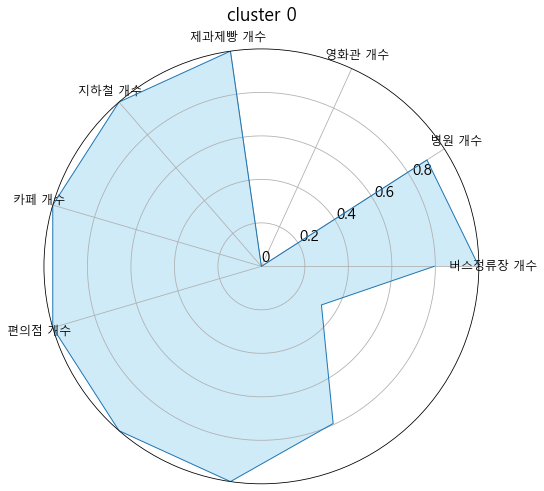

None


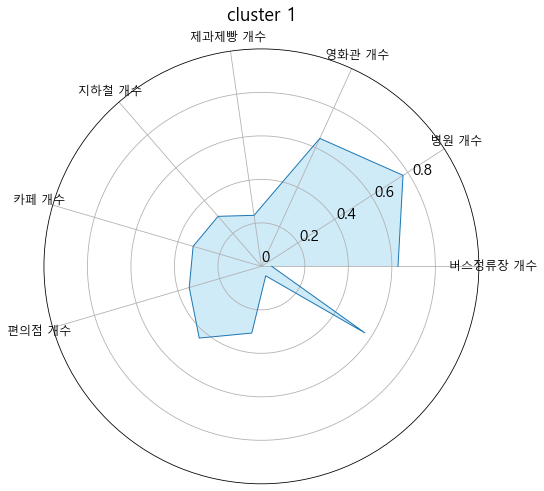

None


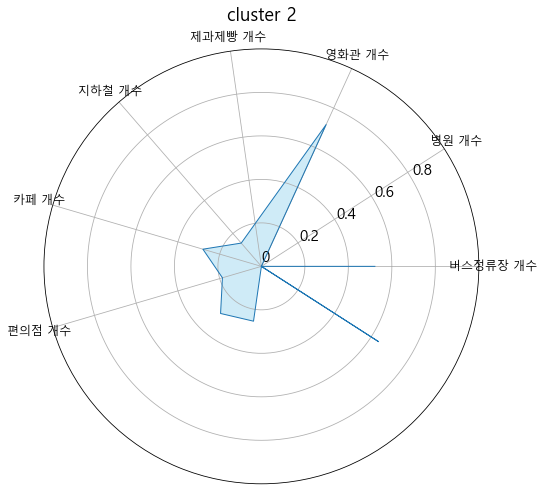

None


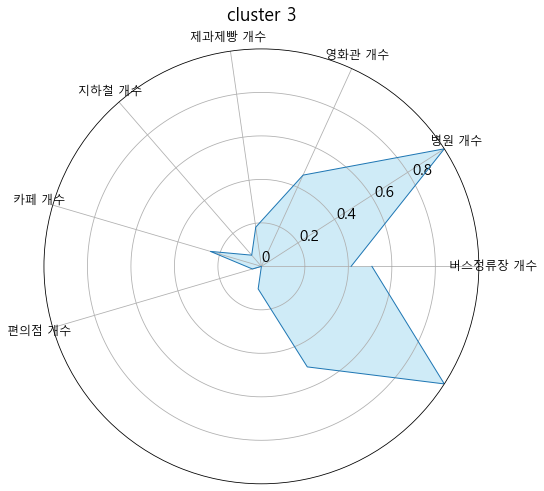

None


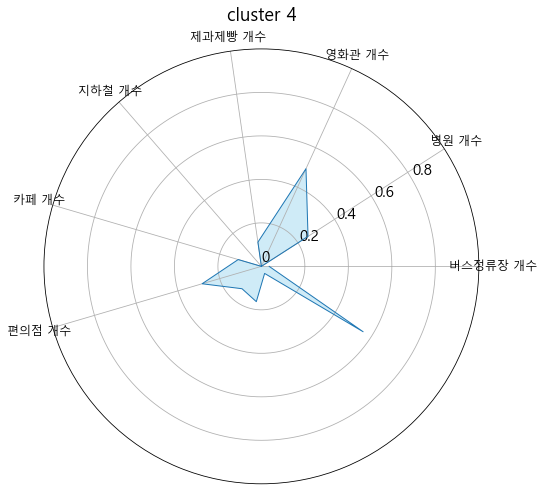

None


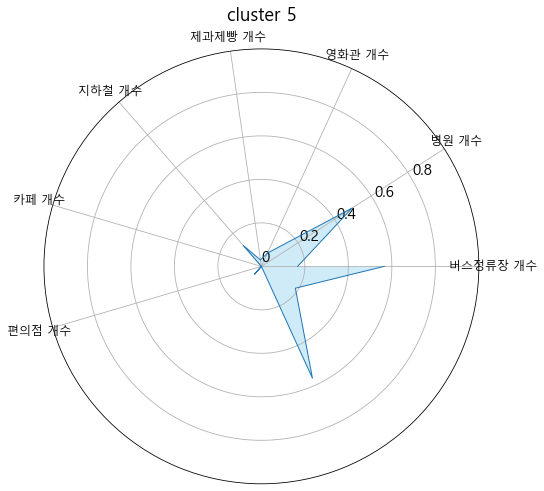

None


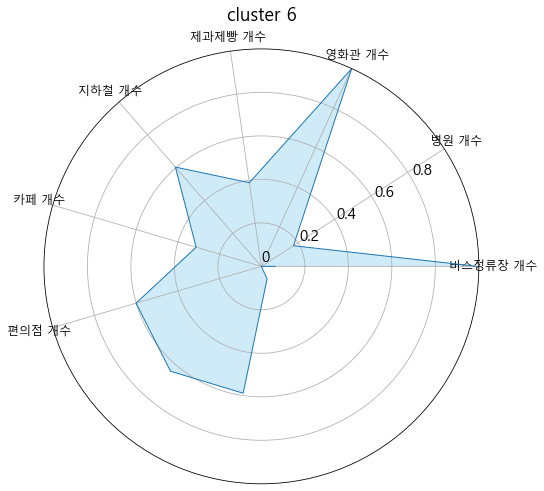

None


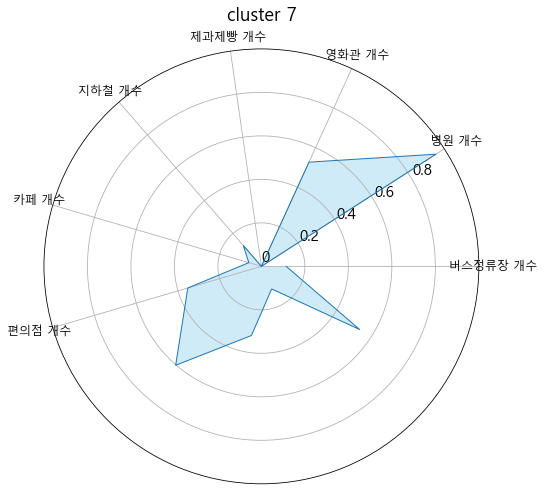

None


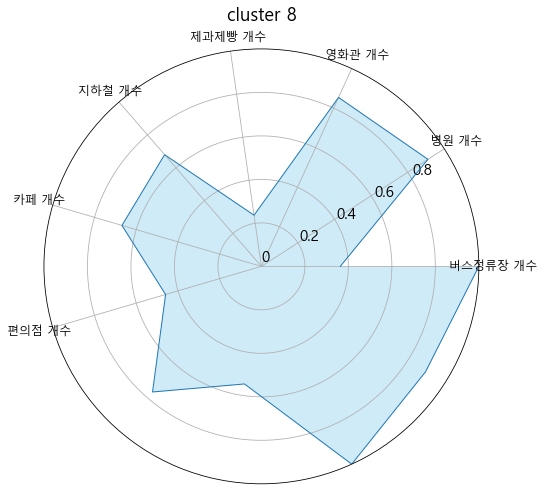

None


In [118]:
for i in range(9) :
    print(chart_cluster(i))

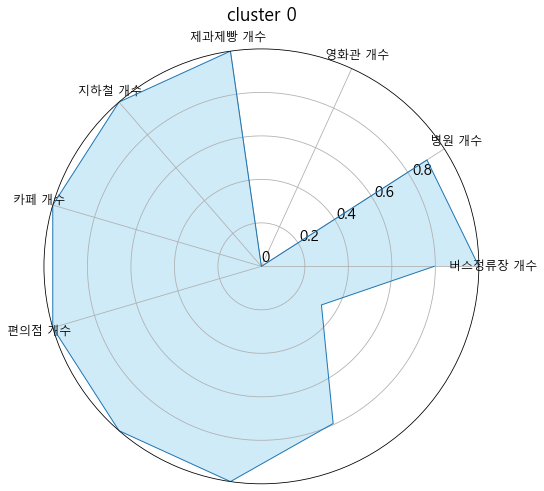

In [126]:
chart_cluster(0)

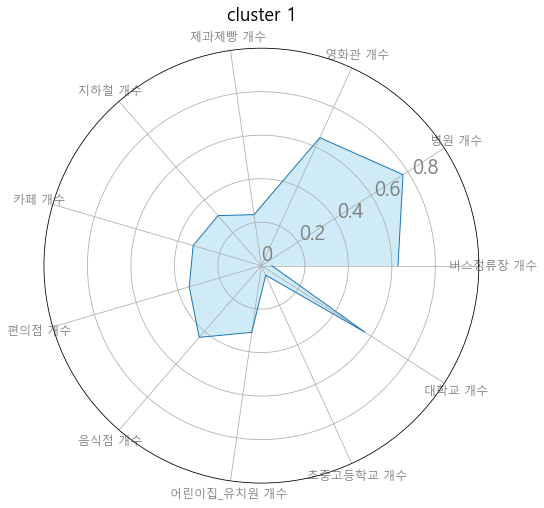

In [104]:
chart_cluster(1)

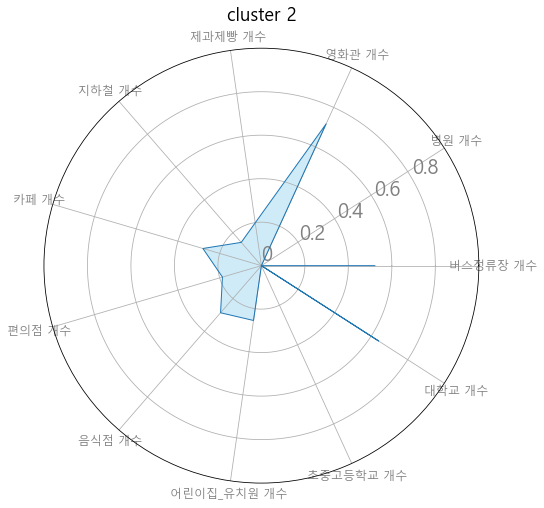

In [105]:
chart_cluster(2)

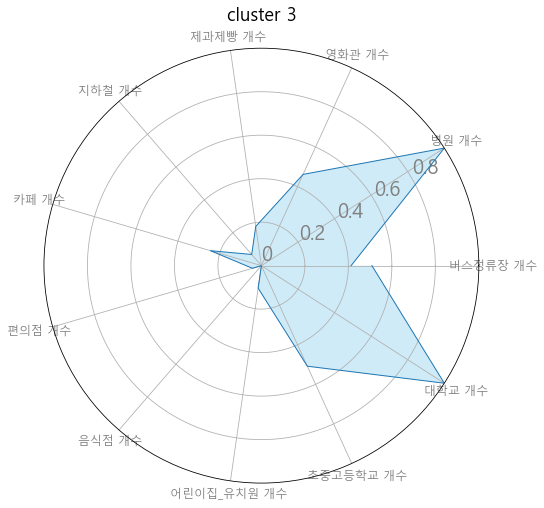

None


In [106]:
print(chart_cluster(3))